In [3]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA 
import numpy as np
import matplotlib.pylab as plt
from adjustText import adjust_text
from pandas.plotting import scatter_matrix
import matplotlib.pylab as plt
from sklearn.cluster import KMeans  
from sklearn.metrics import silhouette_score 

data = pd.read_csv('/Users/nivethida/Downloads/universities_pca_2.csv')

In [21]:
#Sub Category 1

# No Missing records
# All entries are float
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler
import pandas as pd

data = pd.read_csv('/Users/nivethida/Downloads/universities_pca_2.csv')

scaler = StandardScaler()
data = data.iloc[:, 1:]

# Using standard scalar
scaler = StandardScaler()
standardized_data = norm_df = pd.DataFrame(scaler.fit_transform(data), index=data.index, columns=data.columns) 
print("StandardScaler: \n", standardized_data.head(5), "\n")

# Using minmax
scaler = MinMaxScaler()
standardized_data2 = pd.DataFrame(scaler.fit_transform(data), index=data.index, columns=data.columns)
print("MinMaxScaler: \n",standardized_data2, "\n")

# using robust scalar
transformer = RobustScaler().fit(data[1:]) 
normalized_data = transformer.transform(data[1:]) 
print("Using robust scalar: \n",normalized_data, "\n")

# Using MaxAbs scalar
scalar =   MaxAbsScaler().fit(data[1:])
normalized_data = transformer.transform(data[1:])
print("Using maxabs scalar: \n",normalized_data, "\n")      

# I have decided to used min max scalar for the rest of the assignment.

StandardScaler: 
    # appli. rec'd  # appl. accepted  # new stud. enrolled  \
0       -0.726085         -0.766447             -0.793414   
1       -0.737636         -0.778042             -0.756242   
2       -0.575673         -0.589724             -0.539768   
3       -0.624090         -0.616912             -0.714697   
4        0.311318         -0.225084             -0.487290   

   % new stud. from top 10%  % new stud. from top 25%  # FT undergrad  \
0                 -0.650759                 -0.573903       -0.710495   
1                 -1.300829                 -1.558991       -0.658397   
2                  2.112035                  1.593292       -0.468871   
3                 -0.109035                 -0.426140       -0.648535   
4                  0.107655                  0.214168       -0.569208   

   # PT undergrad  in-state tuition  out-of-state tuition      room     board  \
0        0.046333         -0.335086             -0.700046 -0.843743  0.667644   
1        0.680

In [3]:
#Pre analysis before PCA
import pandas as pd
data = pd.read_csv('/Users/nivethida/Downloads/universities_pca_2.csv')
data.info() # View data

# No Missing records
# All entries are float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 18 columns):
College Name                471 non-null object
# appli. rec'd              471 non-null int64
# appl. accepted            471 non-null int64
# new stud. enrolled        471 non-null int64
% new stud. from top 10%    471 non-null int64
% new stud. from top 25%    471 non-null int64
# FT undergrad              471 non-null int64
# PT undergrad              471 non-null int64
in-state tuition            471 non-null int64
out-of-state tuition        471 non-null int64
room                        471 non-null int64
board                       471 non-null int64
add. fees                   471 non-null int64
estim. book costs           471 non-null int64
estim. personal $           471 non-null int64
% fac. w/PHD                471 non-null int64
stud./fac. ratio            471 non-null float64
Graduation rate             471 non-null int64
dtypes: float64(1), int64(16), object(1)
memor

In [18]:
# Pre analysis before PCA
# LoOking for any instances having same value?
data.describe()
# In-state and Out-of-state have same max tution
# No zero varience
# No zero s

,# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.00000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,3147.303609,2062.955414,780.704883,28.012739,55.651805,3562.938429,797.454352,9406.634820,10575.161359,2221.10828,2121.940552,379.021231,548.783439,1311.940552,73.208068,13.962633,65.562633
std,4073.138136,2503.752754,915.633300,18.479196,20.324333,4669.226389,1545.796419,5516.794516,4311.672049,713.18811,566.861037,355.855253,163.185575,681.847238,16.665649,3.898855,18.146912
min,77.000000,61.000000,27.000000,1.000000,9.000000,249.000000,1.000000,608.000000,1044.000000,640.00000,531.000000,10.000000,90.000000,250.000000,8.000000,2.900000,15.000000
25%,802.000000,635.500000,264.000000,15.000000,40.000000,1018.000000,81.500000,3650.500000,7290.000000,1740.00000,1750.000000,137.500000,500.000000,850.000000,63.000000,11.300000,53.000000
50%,1646.000000,1227.000000,443.000000,23.000000,54.000000,1715.000000,299.000000,9858.000000,10100.000000,2090.00000,2082.000000,280.000000,500.000000,1200.000000,76.000000,13.400000,66.000000
75%,3862.000000,2456.000000,896.500000,36.000000,69.000000,4055.500000,869.000000,13246.000000,13286.000000,2663.00000,2420.000000,486.000000,600.000000,1600.000000,87.000000,16.450000,79.000000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,20100.000000,20100.000000,4816.00000,4541.000000,3247.000000,2340.000000,6800.000000,103.000000,28.800000,118.000000


In [ ]:
# Pre analysis before PCA
# Do we have any feature that is highly corelated ?
data.corr()
#application accecpted and applica received
# new stu enrolled and ft undegrad
# ft undergrad and new stu enrolled
#New stu from to 10 and 20
#out of state and instate tuition

In [9]:
# Sub category 2.1
# Explained variance by component
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA  #For PCA

scaler = MinMaxScaler() #Am using min max scaler
pcs = PCA(whiten=True)
scaledData = pd.DataFrame(pcs.fit_transform(scaler.fit_transform(data.iloc[:,1:])),
                      columns=['PC{}'.format(i) for i in range(1, len(data.iloc[:,1:].columns) + 1)]) 
scaledData.head()
                          

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-0.694017,-0.712218,-0.199021,2.427105,-0.248957,-2.109476,1.382989,1.394826,0.418490,-0.184980,1.685107,-0.505497,-1.100050,-0.747420,0.493196,-0.116278
1,-1.345484,-1.127077,0.580702,1.697747,-1.523022,0.855264,-0.670533,1.047350,-0.511319,-2.560828,-0.557086,0.294791,0.721178,1.714918,0.400643,-0.447853
2,0.834128,0.339727,-2.058898,0.288680,-0.413592,0.537881,1.326476,0.381057,0.418668,-0.618879,-1.283485,1.426036,0.423111,0.020694,0.617220,0.581347
3,-0.440296,-0.712704,-0.758674,1.192295,0.340365,-0.578288,0.351317,1.528346,0.582275,-1.294826,-0.178288,0.420163,-0.807991,-0.248523,0.704053,0.521778
4,-0.762631,-0.110402,-1.642377,0.858098,-0.486873,0.628348,0.420154,0.042938,0.551891,0.681923,2.849480,-0.001616,-0.684945,-0.898671,1.302816,0.131740


In [12]:
summary = pd.DataFrame({'Explained Variance': pcs.explained_variance_, #explained variance
                           'Explained Variance Ratio': pcs.explained_variance_ratio_,  #explained variance %
                           'Cumulative Proportion': np.cumsum(pcs.explained_variance_ratio_)}) #cumulative %
summary = summary.transpose()
summary.columns = scaledData.columns
summary

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
Explained Variance,0.219108,0.079210,0.032307,0.018368,0.017194,0.015844,0.012831,0.010840,0.009752,0.007538,0.004507,0.003695,0.002749,0.002020,0.001268,0.000509
Explained Variance Ratio,0.500544,0.180951,0.073804,0.041962,0.039280,0.036196,0.029311,0.024763,0.022279,0.017220,0.010297,0.008442,0.006280,0.004613,0.002897,0.001163
Cumulative Proportion,0.500544,0.681495,0.755299,0.797261,0.836541,0.872736,0.902047,0.926811,0.949089,0.966309,0.976606,0.985048,0.991327,0.995941,0.998837,1.000000


Text(0.5, 1.0, 'Explained Variance by Components Graph')

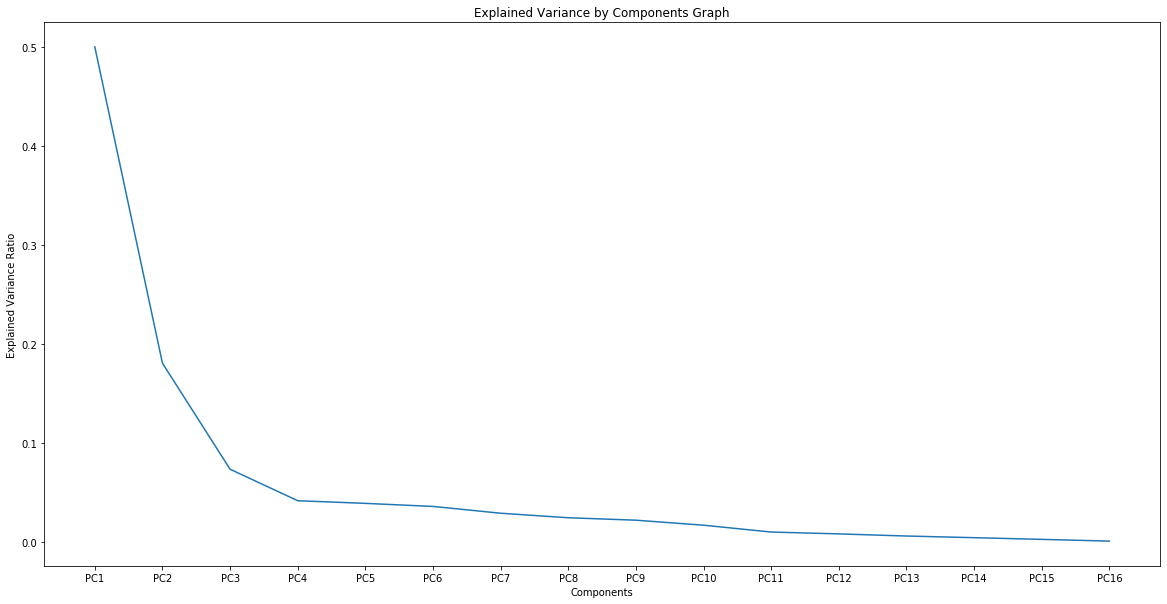

In [24]:
# scree plot

plt.figure(figsize=(20,10))
plt.plot(summary[1:2].transpose())
plt.xlabel('Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Components Graph')

# I plan to use first three components as the inflection point of the inflection plot is at 4 also when I look in to 
# the cumulative proportion PC4 have 79 % of necessary details.

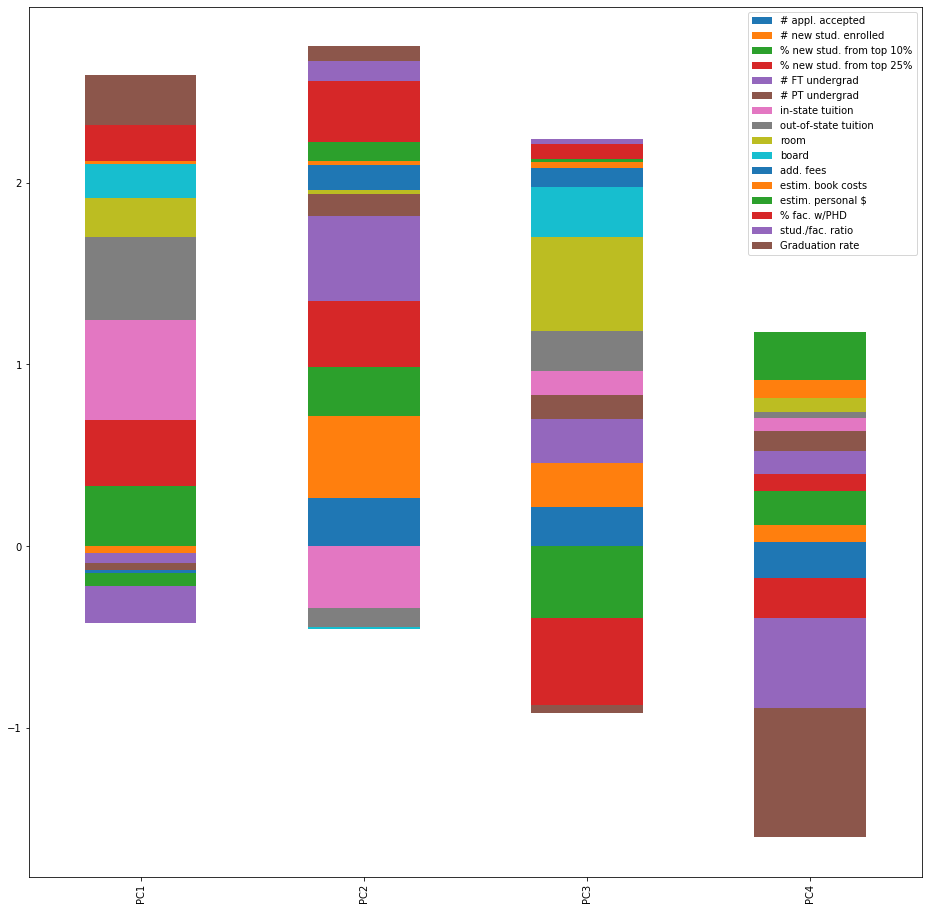

In [26]:
# Sub category 2.2
# Analysis of the first 4 components 
import numpy as np
summary = pd.DataFrame({'Explained Variance': pcs.explained_variance_, #explained variance
                           'Explained Variance Ratio': pcs.explained_variance_ratio_,  #explained variance %
                           'Cumulative Proportion': np.cumsum(pcs.explained_variance_ratio_)}) #cumulative %
summary = summary.transpose()
summary.columns = scaledData.columns
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=summary.columns, 
                                index=data.iloc[:,1:].columns)
pcsComponents_df[['PC1','PC2','PC3','PC4']].transpose().plot(kind='bar', stacked=True,figsize=(16, 16))

# In the bar chart below we can see that
# PC1 is mostly represented by Pink, Red and Grey ie in state tuition,new stu from top 25 and out of state tuition
# PC2 is mostly represented by Red, Purple and Orange ie new stu from top 25, stud/ fac ratio and new stu enrolled
# PC2 is mostly represented by Red and Lime green ie new stu from top 25 and room
# PC4 is mostly represented by Brown and Purple ie Graduation rate and stud/ fac ratio

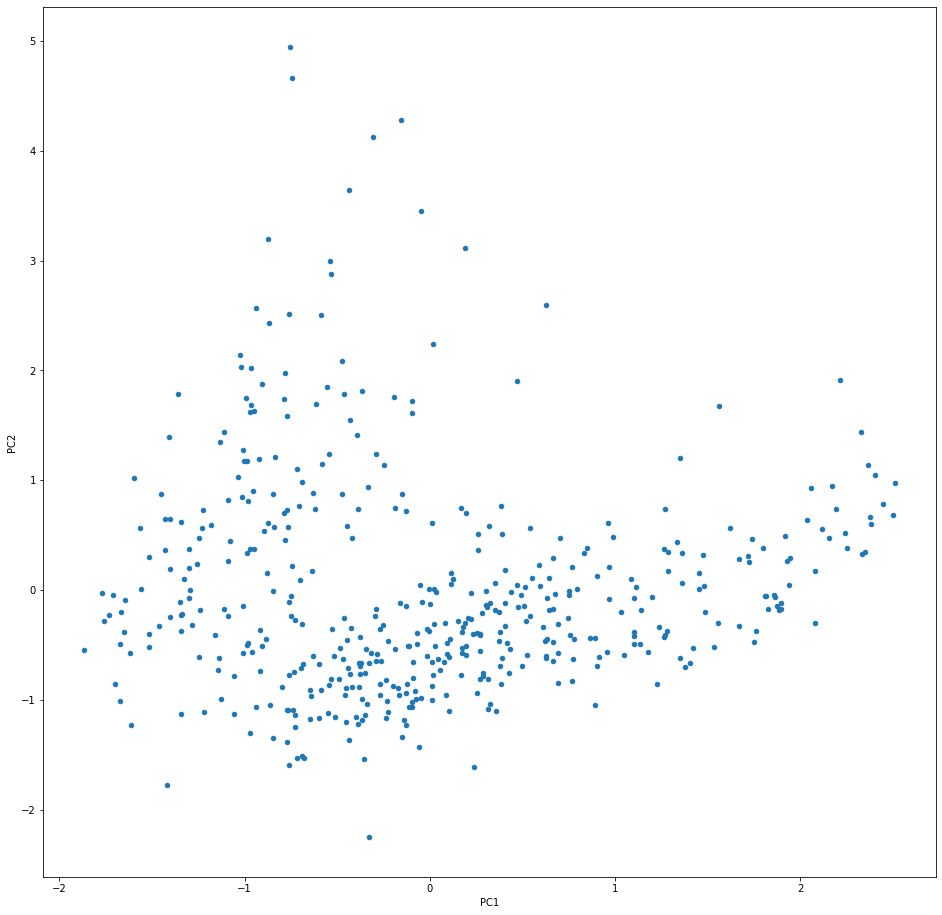

In [25]:
# Subcategory 2.3
# Scatter plot the first 2 components

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA  #principal components Analysis

scaler = MinMaxScaler() #min max scaler
pcs = PCA(whiten=True)
scaledData = pd.DataFrame(pcs.fit_transform(scaler.fit_transform(data.iloc[:,1:])),
                      columns=['PC{}'.format(i) for i in range(1, len(data.iloc[:,1:].columns) + 1)]) 
scaledData.plot.scatter(x='PC1', y='PC2',figsize=(16, 16))
# We see natural clusting of points.
# Avoided the named points for the plot as it looks cluttered with 400+ records.